# Gaussove eliminacije i LU rastav (nastavak)

Implementacija funkcije koja računa $LU$ rastav matrice A

In [98]:
import numpy as np
def LU_dekompozicija(A):
    n=len(A)
    for k in range(0,n-1):
        for i in range(k+1,n):
            if A[i,k]!=0.0:
                A[i,k]=A[i,k]/(A[k,k]) #multiplikator 
                A[i, k+1:n]=A[i, k+1:n]-A[i,k]*A[k, k+1:n]
    return A
    

Funkciju ćemo primijeniti na matrici $$\begin{bmatrix} 2& 1& 0\\ 4& 4& 5\\ 6& 7& 8\end{bmatrix}$$
Kao izlaz dobivamo matricu čiji gornji trokut je matrica $U$ a elementi ispod glavne dijagonale su elementi matrice $L$

In [99]:
A=np.array([[2.0, 1.0, 3.0 ],[4.0, 4.0, 5.0], [6.0, 7.0, 8.0]])
B=LU_dekompozicija(A)
print(B)

[[ 2.  1.  3.]
 [ 2.  2. -1.]
 [ 3.  2.  1.]]


Matricu $L$ možemo dobiti preko funkcije np.tril (proučiti kako ova funkcija radi), a matricu $U$ pomoću **np.triu(ulazna matrica, id dijagonale)**

Funkcija *tril(ulazna matrica, identifikator dijagonale )* vraća matricu koja uzima donji dio ulazne matrice ispod(i uključujući) dijagonalu s time da glavna dijagonala ima identfikator 1, dijagonala iznad nje 1 i dijagonala ispod -1 itd. Slično je sa funkcijom *triu(ulazna matrica, id dijagonale)*

In [100]:
L=np.tril(A,-1)+np.identity(3)
print(L)

[[1. 0. 0.]
 [2. 1. 0.]
 [3. 2. 1.]]


In [101]:
U=np.triu(A,0)
print(U)

[[ 2.  1.  3.]
 [ 0.  2. -1.]
 [ 0.  0.  1.]]


Rješavanje sustava Ly=b (supstitucije unaprijed). u donjem kodu  funkcija np.dot(x,y) predstavja skalarni produkt vektora. (Dijagonalni elementi od $L$ su 1 pa nije ni potrebni dijeliti s dijagonalnim elementima u donjem kodu)

In [102]:
def forward(L,b):
# supstitucija unaprijed
    b[0] = b[0] / L[0, 0]
    n=len(L)
    for i in range(1, n):
        b[i] = (b[i] - np.dot(L[i,:i], b[:i])) / L[i,i]
    return b

In [103]:
b=np.array([[-1],[-1],[-2]])

In [104]:
y=forward(L,b)
print(y)


[[-1]
 [ 1]
 [-1]]


Rješavanje sustava $Ux=y$ odnosno povratne supstitucije

In [109]:
def backward(U,b):
# supstitucija unatrag
    n=len(U)
    for k in range(n-1,-1,-1):
        b[k] = (b[k] - np.dot(U[k,k+1:n],b[k+1:n]))/U[k,k]
    return b

In [110]:
x=backward(U,y)
print(x)

[[ 1]
 [ 0]
 [-1]]


U sljedećem videu možemo vidjeti rješenja zadataka koji su bili zadani na prethodnom predavanju

In [118]:
from IPython.lib.display import YouTubeVideo
vid = YouTubeVideo("kzMaHhbHilI")
display(vid)

## 1. Kako nastaje linearan sustav. Primjer trodijagonalnog sustava. Thomasov algoritam

U ovom dijelu predavanja prikazat ćemo kako nastaje jedan trodijagonalni linearan sustav iz diskretizacije diferencijalne jednadžbe.


In [114]:
from IPython.lib.display import YouTubeVideo
vid = YouTubeVideo("9vwZLHGMMGg")
display(vid)

**Napomena** U gornjem videu na str6. za $i=5$ je pogreška (ne treba lijevu stranu množiti s $\frac{1}{h^2}$ jer je već faktor $h^2$ već na desnoj strani)

**Zadatak** Razmislite o implementaciji Thomasovog algoritma iz prethodnog video predavanja kojeg primijenjujemo za rješavanje diferencijelne jednadžbe i po volji odabranu desnu stranu! Također svoje rješenje prikažite grafički i usporedite s točnim rješenjem! Ovdje će implementacija biti dodana do početka sljedećeg predavanja!

# Mogući problemi (podsjetnik s prethodnog predavanja)
Razmislimo sada koji nam se **problemi** mogu javiti prilikom provođenja $LU$ faktorizacije. To su
1. **Pivotni element je 0.**


Npr.Imamo matricu $A=\begin{bmatrix} 0& 1\\
1&0\end{bmatrix}$ i želimo provesti algoritam za $LU$ faktorizaciju koji smo opisali, naići ćemo na problem: *Možemo li uopće poništiti element $a_{21}$? Znači li to da $LU$ faktorizacija ne postoji*


**Uočimo!**Ako zamijenimo retke ove matrice "problem" iz gornjih pitanja nestaje :).

**Pitanje!** Ima li svaka regularna matrica $LU$ rastav? 

(odgovor: Nema, kao što to vidimo u primjeru za gornju matricu $A$, jer navedena matrica je regularna. Nadalje, postoje i singularne matrice koje imaju $LU$ rastav. Primjer jedna takve matrice je $B=\begin{bmatrix}1&1\\1& 1\end{bmatrix}$)


2.** Ako imamo malu vrijednost za pivotni element! **



# Pivotiranje

Sada ćemo opisati kada nastaje potreba za "pivotiranjem"

In [117]:
from IPython.lib.display import YouTubeVideo
vid = YouTubeVideo("97PMccV56v8")
display(vid)

Provedimo sada algoritam $LU$ faktorizacije s parcijalnim pivotiranjem na primjeru jedne matrice reda $4\times 4$

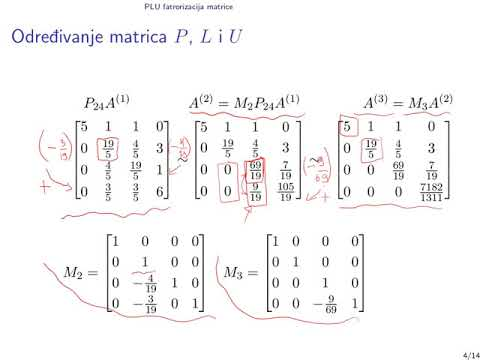

In [116]:
from IPython.lib.display import YouTubeVideo
vid = YouTubeVideo("kNbNvxmdJho")
display(vid)

U sljedećem predavanju govorit ćemo o implementaciji ove metode kao i o skraćenom zapisu rješavanja sustava iz kojeg možemo iščitati matrice P, L, U